In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import os
from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [2]:
model=Sequential()
model.add(ResNet50(include_top = False, pooling='avg', weights='imagenet'))
model.add(Dense(2, activation='sigmoid'))
model.layers[0].trainable = False

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [4]:
from keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_path = 'C:/Users/Arpit/Desktop/Project/Datasets/sample-spotgarbage-GINI/spotgarbage/train'
valid_path = 'C:/Users/Arpit/Desktop/Project/Datasets/sample-spotgarbage-GINI/spotgarbage/test'

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
training_set = data_generator.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
test_set = data_generator.flow_from_directory(valid_path,
                                            target_size = (128, 128),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1963 images belonging to 2 classes.
Found 491 images belonging to 2 classes.


In [7]:
model_details=model.fit(training_set,batch_size=16, epochs = 30, validation_data=test_set, verbose = 2,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/30
123/123 - 73s - loss: 1.6673 - accuracy: 0.8497 - val_loss: 1.9930 - val_accuracy: 0.8635
Epoch 2/30
123/123 - 62s - loss: 1.0328 - accuracy: 0.9078 - val_loss: 1.8403 - val_accuracy: 0.8656
Epoch 3/30
123/123 - 63s - loss: 0.8449 - accuracy: 0.9221 - val_loss: 1.5383 - val_accuracy: 0.8921
Epoch 4/30
123/123 - 64s - loss: 0.6168 - accuracy: 0.9394 - val_loss: 1.9858 - val_accuracy: 0.8635
Epoch 5/30
123/123 - 63s - loss: 0.4962 - accuracy: 0.9470 - val_loss: 2.1054 - val_accuracy: 0.8656
Epoch 6/30
123/123 - 63s - loss: 0.3640 - accuracy: 0.9501 - val_loss: 1.9681 - val_accuracy: 0.8534
Epoch 7/30
123/123 - 61s - loss: 0.2291 - accuracy: 0.9587 - val_loss: 2.0423 - val_accuracy: 0.8717
Epoch 8/30
123/123 - 61s - loss: 0.1845 - accuracy: 0.9699 - val_loss: 1.7344 - val_accuracy: 0.8941
Epoch 9/30
123/123 - 62s - loss: 0.1746 - accuracy: 0.9725 - val_loss: 2.2979 - val_accuracy: 0.8758
Epoch 10/30
123/123 - 60s - loss: 0.2156 - accuracy: 0.9730 - val_loss: 2.6983 - val_accura

In [8]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [9]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

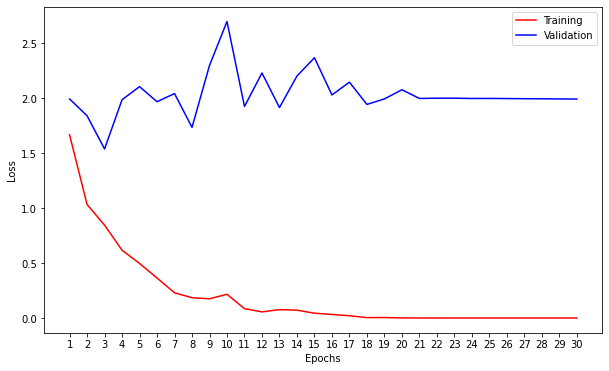

In [11]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

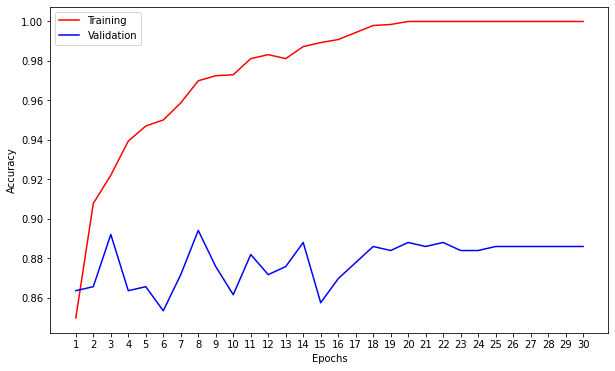

In [12]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [13]:
from IPython.display import Image
from keras.preprocessing import image
import tensorflow
img_path = 'C:/Users/Arpit/Desktop/Project/Datasets/sample-spotgarbage-GINI/spotgarbage/test/garbage-queried-images/9e362c94-6799-11e5-ba3c-40f2e96c8ad8.jpg'
test_image = image.load_img(img_path, target_size = [128,128])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0]==0:
    print("Garbage")
else:
    print("Non-Garbage")

Non-Garbage
